In [186]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [187]:

from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [188]:
path = untar_data(URLs.MNIST_SAMPLE)

In [189]:
#hide
Path.BASE_PATH = path

In [190]:
path.ls()

(#3) [Path('labels.csv'),Path('valid'),Path('train')]

In [191]:
(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

In [192]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png'),Path('train/3/10093.png'),Path('train/3/10097.png'),Path('train/3/10099.png'),Path('train/3/10116.png'),Path('train/3/10125.png'),Path('train/3/10137.png'),Path('train/3/10141.png'),Path('train/3/10144.png'),Path('train/3/10155.png'),Path('train/3/10161.png')...]

In [193]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [194]:
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [195]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [196]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [197]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

(6131, 6265)

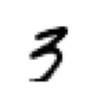

In [198]:
show_image(three_tensors[7]); 

In [199]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [200]:
len(stacked_threes.shape)

3

In [201]:
stacked_threes.ndim

3

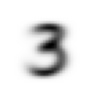

In [202]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

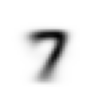

In [203]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

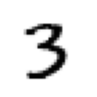

In [204]:
a_3 = stacked_threes[1]
show_image(a_3);

In [205]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs,dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [206]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [207]:
valid_3_tens = torch.stack([tensor(Image.open(o))
for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o))
for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [208]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)

tensor(0.1114)

In [209]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1470, 0.1633, 0.1359,  ..., 0.1413, 0.1367, 0.1175]),
 torch.Size([1010]))

In [210]:
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)

In [211]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [212]:
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

In [213]:
accuracy_3s = is_3(valid_3_tens).float() .mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()
accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

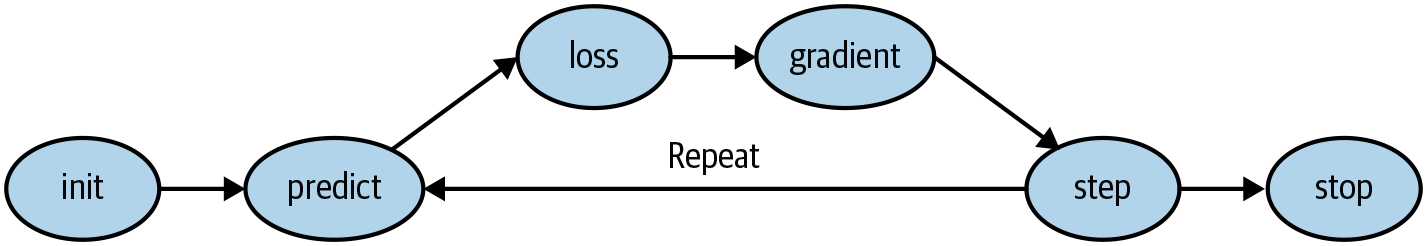

In [214]:
def f(x): return x**2

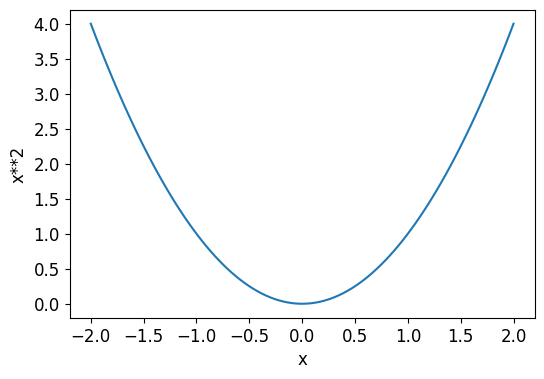

In [215]:
plot_function(f, 'x', 'x**2')

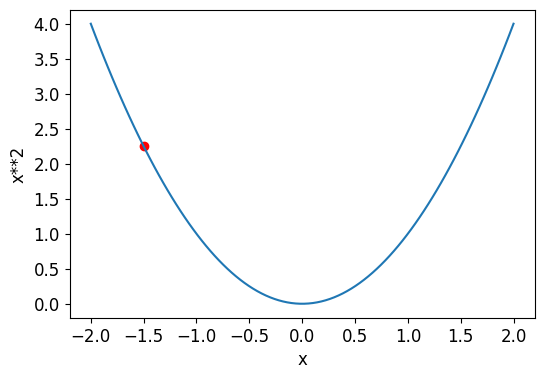

In [216]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red');

In [217]:
xt = tensor(3.).requires_grad_()
yt = f(xt)
yt.backward()
xt.grad
tensor(6.)

tensor(6.)

In [218]:
xt = tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [219]:
def f(x): return (x**2).sum()
yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [220]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

In [221]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [222]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
speed

tensor([68.3685, 55.4076, 44.4451, 30.2411, 29.3986, 12.8281,  3.5521,  3.9611,  3.9833,  3.6889,  0.8076,  2.5519,  7.4469, 10.8185, 15.9909, 25.5206, 34.6822, 42.4376, 55.8360, 66.8506])

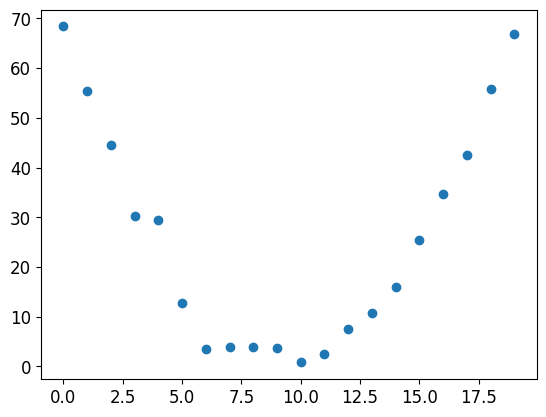

In [223]:
plt.scatter(time,speed);

In [224]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [225]:
def mse(preds, targets): return ((preds-targets)**2).mean()

In [226]:
params = torch.randn(3).requires_grad_()

In [227]:
preds = f(time, params)

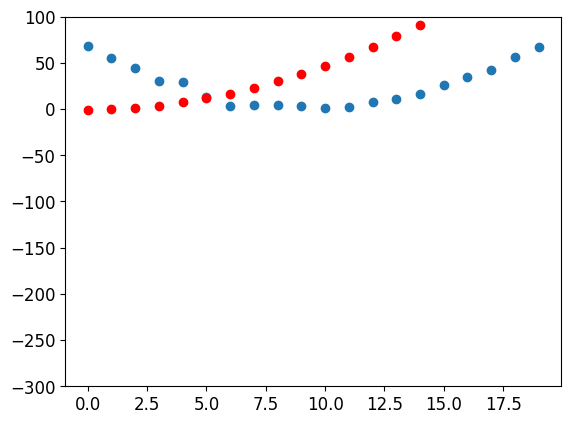

In [228]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, preds.detach().numpy(), color='red')
    ax.set_ylim(-300,100)
show_preds(preds)

In [229]:
loss = mse(preds, speed)
loss

tensor(3650.9380, grad_fn=<MeanBackward0>)

In [230]:
loss.backward()
params.grad

tensor([18362.3672,  1181.5371,    62.6102])

In [231]:
params.grad * 1e-5

tensor([0.1836, 0.0118, 0.0006])

In [232]:
params

tensor([ 0.4527,  0.2614, -1.1479], requires_grad=True)

In [233]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [234]:
preds = f(time,params)
mse(preds, speed)

tensor(1221.6399, grad_fn=<MeanBackward0>)

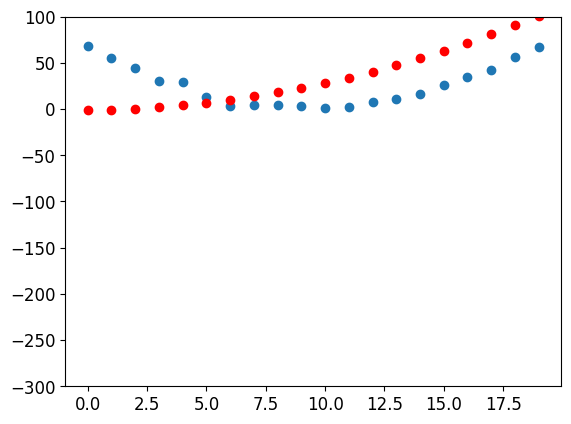

In [235]:
show_preds(preds)

In [236]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [237]:
for i in range(20): apply_step(params)

1221.639892578125
761.9398803710938
674.9478149414062
658.4835815429688
655.3652954101562
654.7725830078125
654.6576538085938
654.6331176757812
654.6259155273438
654.62158203125
654.6182250976562
654.61474609375
654.6113891601562
654.6080932617188
654.6046142578125
654.6012573242188
654.5980224609375
654.5946044921875
654.5912475585938
654.5880126953125


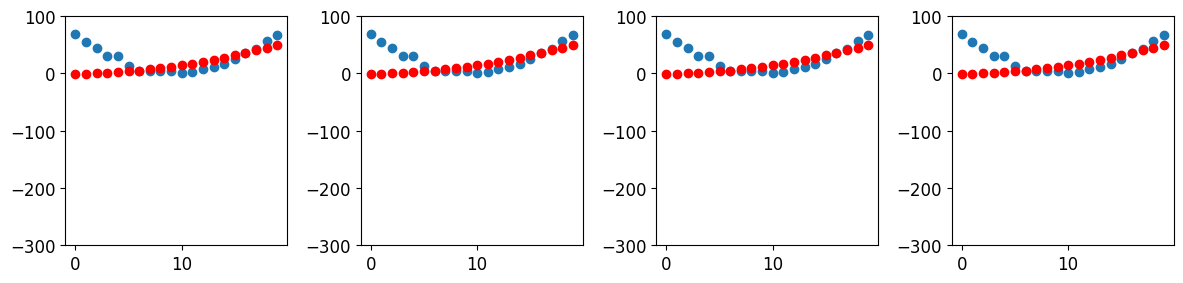

In [238]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

In [239]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
train_x

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [240]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape,train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [241]:
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y

(torch.Size([784]), tensor([1]))

In [242]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [243]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()
weights = init_params((28*28,1))

In [244]:
bias = init_params(1)

In [245]:
(train_x[0]*weights.T).sum() + bias

tensor([-6.2374], grad_fn=<AddBackward0>)

In [246]:
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
preds

tensor([[ -6.2374],
        [ -9.7081],
        [-11.9811],
        ...,
        [  2.1520],
        [  3.7024],
        [  7.0136]], grad_fn=<AddBackward0>)

In [247]:
corrects = (preds>0.0).float() == train_y
corrects

tensor([[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]])

In [248]:
corrects.float().mean().item()

0.2968699634075165

In [249]:
weights = weights.clone()
weights[0] *= 1.0001
preds = linear1(train_x)
((preds>0.0).float() == train_y).float().mean().item()

0.2968699634075165

In [250]:
trgts= tensor([1,0,1])
prds= tensor([0.9, 0.4, 0.2])

In [251]:
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()


In [252]:
torch.where(trgts==1, 1-prds, prds)

tensor([0.1000, 0.4000, 0.8000])

In [253]:
mnist_loss(prds,trgts)

tensor(0.4333)

In [254]:
mnist_loss(tensor([0.9, 0.4, 0.8]),trgts)

tensor(0.2333)

##### Sigmoid

In [255]:
def sigmoid(x): return 1/(1+torch.exp(-x))

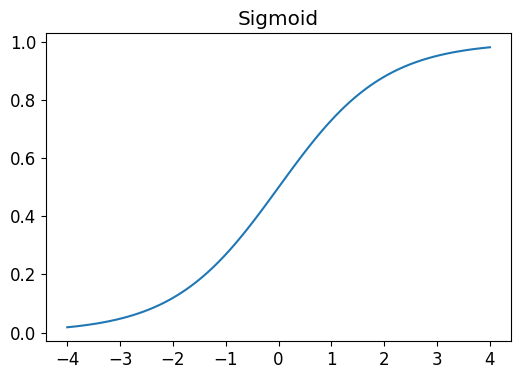

In [256]:
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)

In [257]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [258]:
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 0,  7,  4,  5, 11]),
 tensor([ 9,  3,  8, 14,  6]),
 tensor([12,  2,  1, 10, 13])]

In [259]:
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j'),(10, 'k'),(11, 'l'),(12, 'm'),(13, 'n'),(14, 'o'),(15, 'p'),(16, 'q'),(17, 'r'),(18, 's'),(19, 't')...]

In [260]:
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([ 6, 14, 12, 15, 24, 11]), ('g', 'o', 'm', 'p', 'y', 'l')),
 (tensor([ 0, 16,  2, 18, 25, 21]), ('a', 'q', 'c', 's', 'z', 'v')),
 (tensor([ 8,  7, 19, 23,  1,  9]), ('i', 'h', 't', 'x', 'b', 'j')),
 (tensor([ 4, 13, 10,  5,  3, 17]), ('e', 'n', 'k', 'f', 'd', 'r')),
 (tensor([22, 20]), ('w', 'u'))]

### Final Boss

In [261]:
# ...existing code...

# Ensure the model function is defined
def model(x): 
    return linear1(x.view(-1, 28*28))  # Reshape xb to (batch_size, 28*28)

# Ensure the parameters variable is initialized correctly
parameters = [weights, bias]

# Update the DataLoader loop to use the correct shapes
for xb, yb in dl:
    if xb.size(0) < 28*28:
        continue  # Skip batches that are too small
    pred = model(xb)
    loss = mnist_loss(pred, yb)
    loss.backward()
    for p in parameters:
        p.data -= p.grad * lr
        p.grad.zero_()

# ...existing code...

In [262]:
weights = init_params((28*28,1))
bias = init_params(1)

In [263]:
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [264]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [265]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [266]:
preds = linear1(batch)
preds

tensor([[-0.0843],
        [ 3.8396],
        [ 7.4343],
        [ 8.2737]], grad_fn=<AddBackward0>)

In [267]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.1357, grad_fn=<MeanBackward0>)

In [268]:
loss.backward()
weights.grad.shape,weights.grad.mean(),bias.grad

(torch.Size([784, 1]), tensor(-0.0097), tensor([-0.0678]))

In [269]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [270]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0193), tensor([-0.1355]))

In [271]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0290), tensor([-0.2033]))

In [272]:
weights.grad.zero_()
bias.grad.zero_()

tensor([0.])

In [273]:
def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [274]:
(preds>0.0).float() == train_y[:4]

tensor([[False],
        [ True],
        [ True],
        [ True]])

In [275]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [276]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.7500)

In [277]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)
validate_epoch(linear1)

0.8045

In [278]:
lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.8066

In [279]:
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.8959 0.9316 0.9423 0.9511 0.9555 0.9565 0.9604 0.9648 0.9662 0.9687 0.9706 0.9721 0.9736 0.9741 0.9741 0.975 0.9745 0.9745 0.975 0.9755 

### Creating an Optimizer

In [280]:
linear_model = nn.Linear(28*28,1)

In [281]:
w,b = linear_model.parameters()
w.shape,b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [283]:
class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr
    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr
    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [284]:
opt = BasicOptim(linear_model.parameters(), lr)

In [286]:
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [287]:
validate_epoch(linear_model)

0.5386

In [288]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [289]:
train_model(linear_model, 20)

0.4932 0.7764 0.8545 0.917 0.9351 0.9478 0.9565 0.9629 0.9658 0.9683 0.9697 0.9722 0.9731 0.9746 0.9761 0.9766 0.9771 0.9775 0.978 0.978 

In [290]:
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932 0.8296 0.8423 0.9111 0.9316 0.9473 0.9561 0.9624 0.9658 0.9683 0.9697 0.9717 0.9736 0.9751 0.9756 0.9771 0.9771 0.978 0.978 0.978 

In [291]:
dls = DataLoaders(dl, valid_dl)

In [292]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
loss_func=mnist_loss, metrics=batch_accuracy)

In [293]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.637145,0.503243,0.495584,00:00
1,0.447255,0.257249,0.765947,00:00
2,0.167562,0.157503,0.858685,00:00
3,0.074992,0.098616,0.917076,00:00
4,0.040784,0.073966,0.935231,00:00
5,0.027346,0.060133,0.948479,00:00
6,0.021779,0.051335,0.957311,00:00
7,0.019274,0.045392,0.963690,00:00
8,0.017984,0.041174,0.965653,00:00
9,0.017198,0.038045,0.967615,00:00


In [294]:
def simple_net(xb):
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res

In [295]:
w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

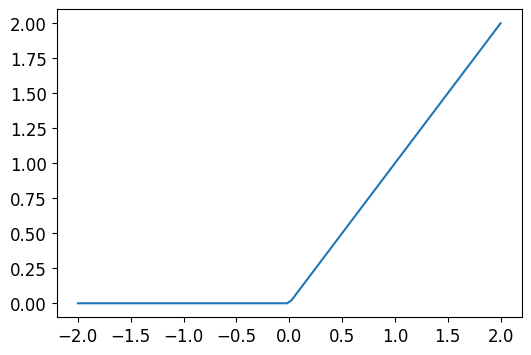

In [296]:
plot_function(F.relu)

In [297]:
simple_net = nn.Sequential(
nn.Linear(28*28,30),
nn.ReLU(),
nn.Linear(30,1)
)

In [298]:
learn = Learner(dls, simple_net, opt_func=SGD,
loss_func=mnist_loss, metrics=batch_accuracy)
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.352757,0.390806,0.517664,00:00
1,0.160189,0.242371,0.789990,00:00
2,0.086645,0.118521,0.913150,00:00
3,0.055531,0.078699,0.942591,00:00
4,0.041317,0.060990,0.956330,00:00
5,0.034200,0.051190,0.963690,00:00
6,0.030205,0.045070,0.965653,00:00
7,0.027661,0.040921,0.968597,00:00
8,0.025853,0.037930,0.968597,00:00
9,0.024463,0.035662,0.971050,00:00


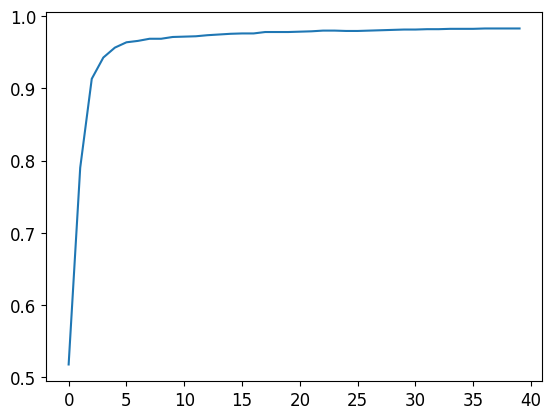

In [299]:
plt.plot(L(learn.recorder.values).itemgot(2));

In [300]:
learn.recorder.values[-1][2]

0.982826292514801

In [301]:
dls = ImageDataLoaders.from_folder(path)
learn = cnn_learner(dls, resnet18, pretrained=False,
loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

/home/himanshu/code/fastaideep/fast/lib/python3.12/site-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,accuracy,time
0,0.108926,0.024451,0.996565,01:00
